In [164]:
print('Data Analysis of Merged Postpaid Customers\n')
print('This is a data analysis of clean, manipulated and merged postpaid customers of an electricity distribution company.\n',
      'The data is analyzed to find the following:\n',
      '1. Total number of customers per location.\n', '2. Total number of customers per customer type and location.\n',
      '3. The number of customers in each tariff category, average bill and average collection.\n','4. The number of customers in province each region, revenue billed, and collection.\n',
      '5. The number of customers in each feeder bands in each province.\n','6. The payment pattern of customers.\n')

Data Analysis of Merged Postpaid Customers

This is a data analysis of clean, manipulated and merged postpaid customers of an electricity distribution company.
 The data is analyzed to find the following:
 1. Total number of customers per location.
 2. Total number of customers per customer type and location.
 3. The number of customers in each tariff category, average bill and average collection.
 4. The number of customers in province each region, revenue billed, and collection.
 5. The number of customers in each feeder bands in each province.
 6. The payment pattern of customers.



In [128]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Import data
customer_listing = pd.read_excel('Postpaid Customers SRT BAND Payment History.xlsx')

In [129]:
# Exploratory Data Analysis
# Print the first five rows of customer_listing
print('The first five rows of customer_listing:\n',customer_listing.head())

The first five rows of customer_listing:
   Province     Location  Account No. Old Account No. Customer Name  \
0      PEI  PORT LAJOYE       185241          181122        AN KAR   
1      PEI  PORT LAJOYE       282347          281448        AOKE O   
2      PEI  PORT LAJOYE       382209          381047        AUBI S   
3      PEI  PORT LAJOYE       485333          481446        AILANI   
4      PEI  PORT LAJOYE       582447          581111        ARU OL   

  Service Address    Tariff Account Status Customer Type SET_UP_DATE  ...  \
0          AGBAMI  D-Non MD         Active           NMD  2016-08-19  ...   
1          A25 AR  D-Non MD         Active           NMD  2016-08-19  ...   
2          AMOJOD  D-Non MD         Active           NMD  2016-08-19  ...   
3          AROMI   D-Non MD         Active           NMD  2016-08-19  ...   
4          ARAROM  D-Non MD         Active           NMD  2016-08-19  ...   

  _merge  Mar-22 Payment  Apr-22 Payment  May-22 Payment  Jun-22 Payment  

In [130]:
# Print a summary of non-missing values and data types in the customer_listing DataFrame
print('NA summary of non-missing values and data types in the customer_listing DataFrame:\n',customer_listing.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129662 entries, 0 to 129661
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Province                   129662 non-null  object        
 1   Location                   129662 non-null  object        
 2   Account No.                129662 non-null  int64         
 3   Old Account No.            129662 non-null  object        
 4   Customer Name              129662 non-null  object        
 5   Service Address            129662 non-null  object        
 6   Tariff                     129662 non-null  object        
 7   Account Status             129662 non-null  object        
 8   Customer Type              129662 non-null  object        
 9   SET_UP_DATE                129662 non-null  datetime64[ns]
 10  meter reading code(R,E,D)  129662 non-null  object        
 11  Current Opening bal.       129662 non-null  float64 

In [131]:
# Comment on non-missing values and data types in the customer_listing DataFrame.
print('Comment:\n', 'Customer_listind has 38 columns and 129,662 rows of customer data.\n',
      'Also, DT Name and DT No columns have missing values.\n', 'The data types of the columns are float64(16), int64(4), object(18).\n',
      'The data type of DT No column should be integer.\n')

Comment:
 Customer_listind has 38 columns and 129,662 rows of customer data.
 Also, DT Name and DT No columns have missing values.
 The data types of the columns are float64(16), int64(4), object(18).
 The data type of DT No column should be integer.



In [132]:
# Print summary statistics for numerical columns in customer_listing.
print('Summary statistics for numerical columns in customer_listing:\n',customer_listing.describe())

Summary statistics for numerical columns in customer_listing:
         Account No.  Current Opening bal.  CURRENT_BILL_AJUSTMENT  \
count  1.296620e+05          1.296620e+05            1.296620e+05   
mean   6.483220e+09          2.090751e+05           -1.178122e+02   
std    3.743034e+09          4.129947e+06            2.796775e+04   
min    1.852410e+05         -2.556968e+06           -9.974237e+06   
25%    3.241698e+09          3.993764e+04            0.000000e+00   
50%    6.483242e+09          1.231598e+05            0.000000e+00   
75%    9.724752e+09          2.518939e+05            0.000000e+00   
max    1.296628e+10          8.658101e+08            1.665385e+05   

       CURRENT_PAYMENT  Energy (kWh)  Current Bill  Current Closing bal.  \
count     1.296620e+05  1.296620e+05  1.296620e+05          1.296620e+05   
mean      1.027851e+04  3.478735e+02  1.562902e+04          2.143078e+05   
std       5.589229e+05  7.948062e+03  5.309246e+05          4.136535e+06   
min       0

Count the values associated with each location in customer_listing:
 PORT LAJOYE          32975
MALPEQUE             26945
RUSTICO              20911
CHARLOTTETOWN        19468
BONSHAW              12074
PEI NATIONAL PARK     8513
FRENCH RIVER          6467
CAVENDISH             2252
KENSINGTON              57
Name: Location, dtype: int64


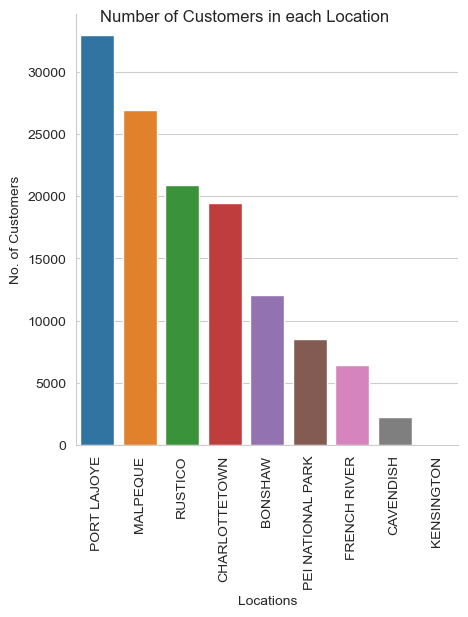

Comments:
 The location with the highest number of customers is PORT LAJOYE with 32,975 customers.
 The location with the lowest number of customers is KENSINGTON with 57 customers.



In [133]:
# Count the values associated with each location in customer_listing and sort in descending order.
print('Count the values associated with each location in customer_listing:\n',
      customer_listing['Location'].value_counts().sort_values(ascending=False))

# Plot a bar chart of the number of customers in each location in customer_listing.
location_order = ['PORT LAJOYE','MALPEQUE','RUSTICO','CHARLOTTETOWN', 'BONSHAW', 'PEI NATIONAL PARK', 'FRENCH RIVER', 'CAVENDISH', 'KENSINGTON']
sns.set_style('whitegrid')
g = sns.catplot(x='Location',kind='count',data=customer_listing,ci=None, order=location_order)
# Set the title of the plot.
g.fig.suptitle('Number of Customers in each Location')
# Reaname the x-axis label.
g.set(xlabel = 'Locations', ylabel = 'No. of Customers')
# Rotate the x-axis labels.
plt.xticks(rotation=90)
plt.show()

print('Comments:\n','The location with the highest number of customers is PORT LAJOYE with 32,975 customers.\n',
        'The location with the lowest number of customers is KENSINGTON with 57 customers.\n')

The number of customers per customer type in customer_listing:
 NMD    128989
MD        673
Name: Customer Type, dtype: int64


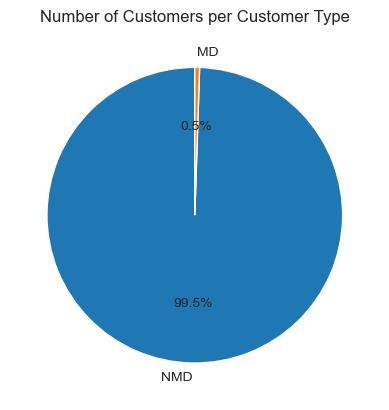

Comments:
 The number of Non Maximum Demand (NMD) customers is 99.9% of the total number of customers.



In [134]:
# Get the number of customers per customer type in customer_listing.
customer_type = customer_listing['Customer Type'].value_counts()
print('The number of customers per customer type in customer_listing:\n',customer_type)

# Plot a pie chart of the number of customers per customer type in customer_listing.
plt.pie(customer_type, labels=customer_type.index, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Number of Customers per Customer Type')
plt.show()

print('Comments:\n','The number of Non Maximum Demand (NMD) customers is 99.9% of the total number of customers.\n')

The number of customers in each customer type:
 Location           Customer Type
BONSHAW            MD                  45
                   NMD              12029
CAVENDISH          MD                  19
                   NMD               2233
CHARLOTTETOWN      MD                 126
                   NMD              19342
FRENCH RIVER       MD                  59
                   NMD               6408
KENSINGTON         MD                  57
MALPEQUE           MD                  69
                   NMD              26876
PEI NATIONAL PARK  MD                  86
                   NMD               8427
PORT LAJOYE        MD                 111
                   NMD              32864
RUSTICO            MD                 101
                   NMD              20810
Name: Customer Type, dtype: int64


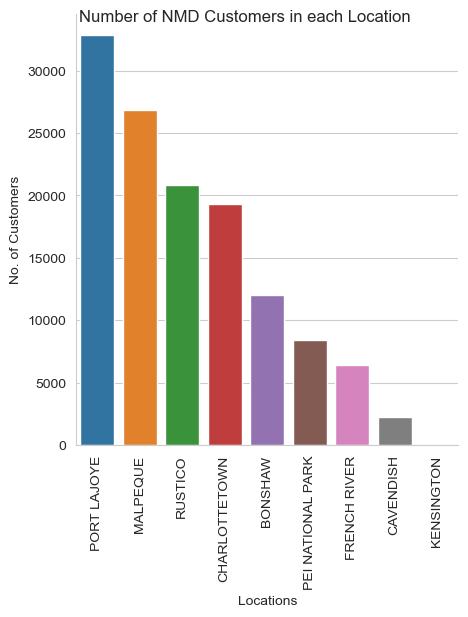

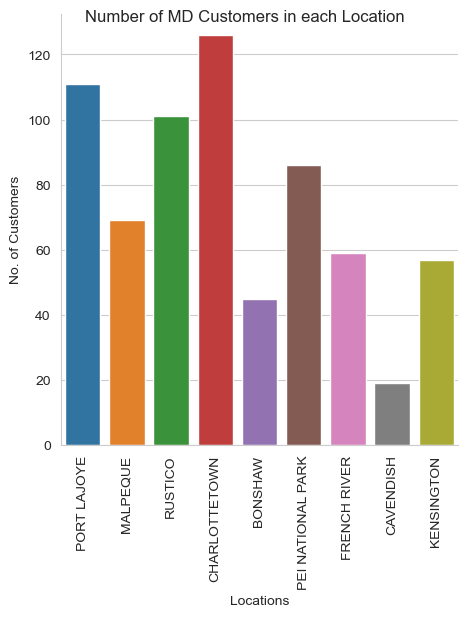

Comments:
 Kessington has only MD customers in its location.
 The location with the highest number of NMD and MD customers is PORT LAJOYE.
 Kessington has more MD customers than Bonshaw and Cavendish.



In [135]:
# Get the number of customers in each customer type for each location in customer_listing.
No_of_customer_type_per_location = customer_listing.groupby(['Location','Customer Type'])['Customer Type'].count()
print('The number of customers in each customer type:\n',No_of_customer_type_per_location)

# Visualise the result.
customer_listing_MD = customer_listing[customer_listing['Customer Type']=='MD']
customer_listing_NMD = customer_listing[customer_listing['Customer Type']=='NMD']

f = sns.catplot(x='Location',kind='count',data=customer_listing_NMD, ci=None, order=location_order)
# Set the title of the plot.
f.fig.suptitle('Number of NMD Customers in each Location')
# Set the axis labels.
f.set(xlabel = 'Locations', ylabel = 'No. of Customers')
# Rotate the x-axis labels.
plt.xticks(rotation=90)

sns.set_style('whitegrid')
g = sns.catplot(x='Location',kind='count',data=customer_listing_MD, ci=None, order=location_order)
# Set the title of the plot.
g.fig.suptitle('Number of MD Customers in each Location')
# Set the axis labels.
g.set(xlabel = 'Locations', ylabel = 'No. of Customers')
# Rotate the x-axis labels.
plt.xticks(rotation=90)

plt.show()

print('Comments:\n','Kessington has only MD customers in its location.\n', 
      'The location with the highest number of NMD and MD customers is PORT LAJOYE.\n',
      'Kessington has more MD customers than Bonshaw and Cavendish.\n')

The number of customers in each tariff category, average bill and average collection:
              No_of_customers     avg_bill  avg_collection  % Collection
Tariff                                                                 
A-Bilateral                1    967838.63            0.00          0.00
B-Non MD                4176     24011.82         8298.24         34.56
A-Non MD                  68      6691.48         2514.71         37.58
C-Non MD               17608     19833.72         8111.77         40.90
C-MD2                      6    225203.71       113757.62         50.51
D-Non MD               76362      8200.72         4600.72         56.10
E-Non MD               30172      6604.72         3818.20         57.81
B-MD1                    161    115461.88        68913.38         59.68
A-MD1                     92    602232.13       379205.74         62.97
B-MD2                      5   2277089.30      1462886.23         64.24
C-MD1                    288    108947.15        

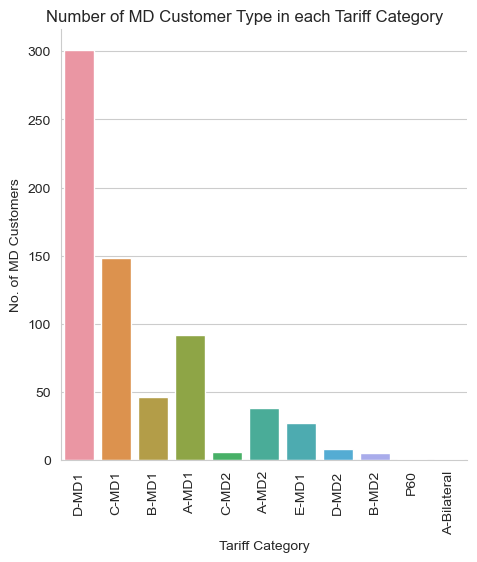

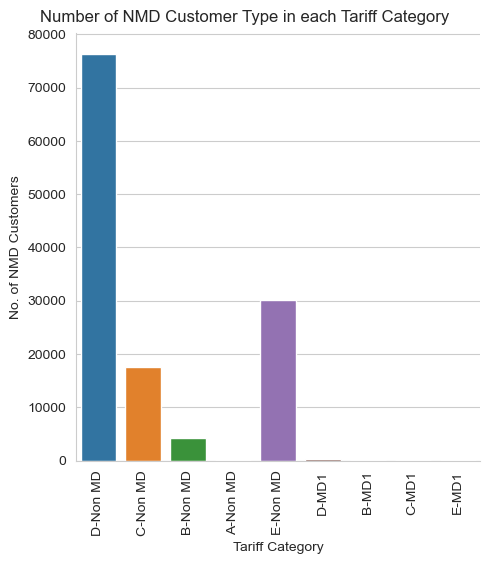

Comments:
 The more customers in the D and C tarriff class.
 Collection from NMD customers is below 60%.
 There are some MD tariff in NMD customer type as shown in the NMD chart.



In [141]:
# The number of customers in each tariff category, average bill and average collection.
avr_rev_per_tariff_class = customer_listing.groupby(['Tariff']).agg(No_of_customers=('Account No.', 'count'),
                                                                             avg_bill=('Current Bill', 'mean'), avg_collection=('PAYMENT', 'mean'))

# Display the number in 2 decimal places.
avr_rev_per_tariff_class['avg_bill'] = Avr_rev_per_tariff_class['avg_bill'].round(2)
avr_rev_per_tariff_class['avg_collection'] = Avr_rev_per_tariff_class['avg_collection'].round(2)

# Add percentage of collection to the table.
avr_rev_per_tariff_class['% Collection'] = Avr_rev_per_tariff_class['avg_collection']/Avr_rev_per_tariff_class['avg_bill']*100
avr_rev_per_tariff_class['% Collection'] = Avr_rev_per_tariff_class['% Collection'].round(2)

# Sort the table in descending order of % collection.
avr_rev_per_tariff_class = Avr_rev_per_tariff_class.sort_values(by='% Collection', ascending=True)

# Print the result.
print('The number of customers in each tariff category, average bill and average collection:\n',avr_rev_per_tariff_class)

# Plot a bar chart of the number of customers in each tariff category in customer_listing.
sns.set_style('whitegrid')
# MD
g = sns.catplot(x='Tariff',kind='count',data=customer_listing_MD,ci=None)
# Set the title of the plot.    
g.fig.suptitle('Number of MD Customer Type in each Tariff Category', y=1.01)
# Set the axis labels.
g.set(xlabel = 'Tariff Category', ylabel = 'No. of MD Customers')
# Rotate the x-axis labels.
plt.xticks(rotation=90)

# NMD
sns.set_style('whitegrid')
g = sns.catplot(x='Tariff',kind='count',data=customer_listing_NMD,ci=None)
# Set the title of the plot.    
g.fig.suptitle('Number of NMD Customer Type in each Tariff Category', y=1.01)
# Set the axis labels.
g.set(xlabel = 'Tariff Category', ylabel = 'No. of NMD Customers')
# Rotate the x-axis labels.
plt.xticks(rotation=90)
plt.show()

print('Comments:\n','The more customers in the D and C tarriff class.\n', 'Collection from NMD customers is below 60%.\n', 
      'There are some MD tariff in NMD customer type as shown in the NMD chart.\n')


In [156]:
# Get the number of customers in each location, the total revenue billed and collection in customer_listing.
avr_rev_per_location = customer_listing.groupby(['Location']).agg(No_of_customers=('Account No.', 'count'),
                                                                  tot_bill=('Current Bill', 'sum'), tot_collection=('PAYMENT', 'sum'))

# Display the number in 2 decimal places.
avr_rev_per_location['tot_bill'] = avr_rev_per_location['tot_bill'].astype(int)
avr_rev_per_location['tot_collection'] = avr_rev_per_location['tot_collection'].astype(int)

# Add percentage of collection to the table.
avr_rev_per_location['% Collection'] = avr_rev_per_location['tot_collection']/avr_rev_per_location['tot_bill']*100
avr_rev_per_location['% Collection'] = avr_rev_per_location['% Collection'].round(2)

# Get the number of customers in each feeder band, the total revenue billed and collection in customer_listing.
avr_rev_per_band = customer_listing.groupby(['SRT BAND']).agg(No_of_customers=('Account No.', 'count'),
                                                                  tot_bill=('Current Bill', 'sum'), tot_collection=('PAYMENT', 'sum'))

# Display the number in 2 decimal places.
avr_rev_per_band['tot_bill'] = avr_rev_per_band['tot_bill'].astype(int)
avr_rev_per_band['tot_collection'] = avr_rev_per_band['tot_collection'].astype(int)

# Add percentage of collection to the table.
avr_rev_per_band['% Collection'] = avr_rev_per_band['tot_collection']/avr_rev_per_band['tot_bill']*100
avr_rev_per_band['% Collection'] = avr_rev_per_band['% Collection'].round(2)


print('The number of customers in each location, the revenue billed and collection:\n',avr_rev_per_location, '\n')
print('The number of customers in each feeder band, the revenue billed and collection:\n',avr_rev_per_band, '\n')
print('Comments:\n','Only Kessington has percentage collection above 90 and the location has only MD customers.\n',
      'Although, the location has the lowest customers, it has the highest revenue billed and collection compared to other locations.\n',
      'Efforts need to be made to increase the revenue billed and collection in other locations with more focus on NMD customers in silver and gold bands.\n')

The number of customers in each location, the revenue billed and collection:
                    No_of_customers   tot_bill  tot_collection  % Collection
Location                                                                   
BONSHAW                      12074  195870432       102841977         52.51
CAVENDISH                     2252   58300167        20435950         35.05
CHARLOTTETOWN                19468  171822300        90143521         52.46
FRENCH RIVER                  6467  101243648        57964754         57.25
KENSINGTON                      57  611584371       570596271         93.30
MALPEQUE                     26945  327607994       153344409         46.81
PEI NATIONAL PARK             8513  104159188        76335032         73.29
PORT LAJOYE                  32975  189709885       104404725         55.03
RUSTICO                      20911  266192248       130369152         48.98 

The number of customers in each feeder band, the revenue billed and collection:
    

In [163]:
# Compare the total revenue billed, average revenue billed and standard deviation of revenue billed in each feeder band.
rev_summary = customer_listing.groupby(['SRT BAND']).agg(tot_bill=('Current Bill', 'sum'),
                                                         avg_bill=('Current Bill', 'mean'), std_bill=('Current Bill', 'std'))

# Display the number in 2 decimal places.
rev_summary['tot_bill'] = rev_summary['tot_bill'].astype(int)
rev_summary['avg_bill'] = rev_summary['avg_bill'].astype(int)
rev_summary['std_bill'] = rev_summary['std_bill'].astype(int)

print('The total revenue billed, average revenue billed and standard deviation of revenue billed in each feeder band:\n',rev_summary, '\n')


The total revenue billed, average revenue billed and standard deviation of revenue billed in each feeder band:
            tot_bill  avg_bill  std_bill
SRT BAND                               
BRONZE     19808299      3051     11153
DIAMOND   102504407     32675    133101
GOLD      365273924     18115     30837
PLATINUM  633013372   3165066  13156815
SILVER    905890231      9088     19019 

